In [1]:
import quandl

# 该 API KEY 仅限课程使用，其他用途请自行注册
quandl.ApiConfig.api_key = "DdXEs2xFciyUXrER9-a7"
# 获取苹果公司股票数据
df_aapl = quandl.get("WIKI/AAPL")
df_aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [2]:
df_aapl.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0


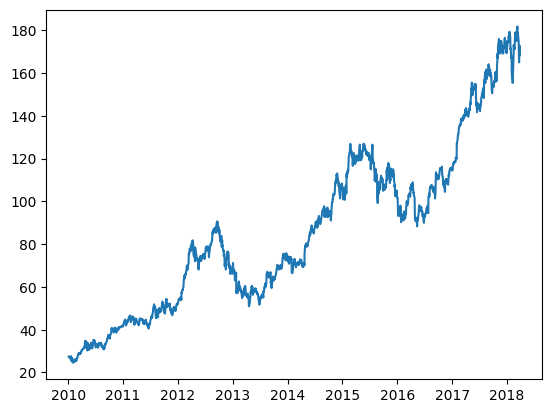

In [3]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
register_matplotlib_converters()

df = df_aapl["2010":]["Adj. Close"]
plt.plot(df)

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df_train = df[:"2018"]  # 训练数据
df_test = df["2018":]  # 测试数据

scaler = MinMaxScaler(feature_range=(0, 1))  # 归一化

# 对数据进行形状转换
df_train_scaler = scaler.fit_transform(df_train.values.reshape(-1, 1))
df_test_scaler = scaler.transform(df_test.values.reshape(-1, 1))

df_train_scaler.shape, df_test_scaler.shape

((2070, 1), (59, 1))

In [9]:
time_step = 1

train_t0 = df_train_scaler[:-time_step]  # 训练数据错位 1 天
train_t1 = df_train_scaler[time_step:]

test_t0 = df_test_scaler[:-time_step]
test_t1 = df_test_scaler[time_step:]

In [12]:
import tensorflow as tf

# 对于序列模型（如LSTM），数据通常是三维的，表示为 (batch_size, timesteps, features)
# input_shape为 (1, 1)，这表示每个样本包含 1 个时间步，每个时间步包含 1 个特征
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(32, input_shape=(1, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(16))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                    │ (None, 1, 32)           │         4,352 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                    │ (None, 16)              │         3,136 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_1 (Dense)                  │ (None, 1)               │            17 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 7,505 (29.32 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer="Adam", loss="mse")

# np.atleast_3d 处理成三维 数量 x 时间step x 特征
# reshape：处理成行
model.fit(np.atleast_3d(train_t0), train_t1.reshape(-1), epochs=5, batch_size=32)

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1749
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0321
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0144
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9881e-04


In [24]:
test_pred = model.predict(np.atleast_3d(test_t0))  # 测试数据预测
test_pred = scaler.inverse_transform(test_pred)  # 数据还原

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step


Text(0.5, 1.0, 'MAPE: 5.046763835787302')

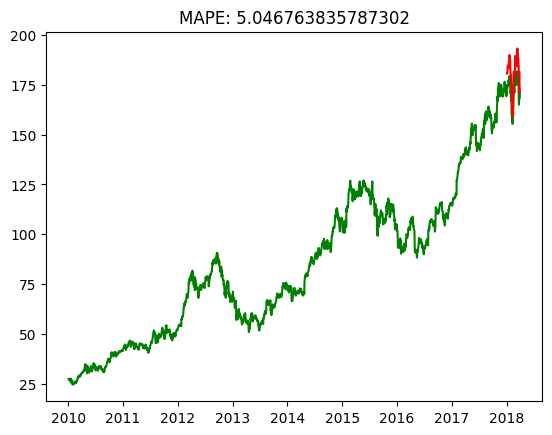

In [21]:
# 以原数据格式，对预测部分进行替换，训练部分数据设为 NAN 方便绘制到同一张图中
df_pred = df.copy()

# len(df_pred) 大，len(test_pred) 小
# [len(df_pred) - len(test_pred):]  === len(test_pred) 的最后一段
df_pred[len(df_pred) - len(test_pred) :] = test_pred.reshape(-1)

# 反向的其他置空
df_pred[: -len(test_pred)] = np.nan


# 计算 MAPE 结果
def mape(y_true, y_pred):
    n = len(y_true)
    mape = 100 * np.sum(np.abs((y_true - y_pred) / y_true)) / n
    return mape


y_true = df[len(df_pred) - len(test_pred) :].values
y_pred = test_pred.reshape(-1)
mape = mape(y_true, y_pred)

plt.plot(df, "g")
plt.plot(df_pred, "r")
plt.title(f"MAPE: {mape}")